In [1]:
from pylab import *

In [2]:
def RK4(EDO,ci,titf,*args,delta=0.1):
    t = arange(titf[0],titf[1]+delta,delta)
    sol = zeros( (len(ci),len(t)) )
    sol[:,0] = array(ci)
    for n in range(len(t)-1):
        tm = t[n] + 0.5*delta
        k1 = EDO(t[n],sol[:,n],*args)
        k2 = EDO(tm,sol[:,n] + 0.5*delta*k1,*args) 
        k3 = EDO(tm,sol[:,n] + 0.5*delta*k2,*args)
        k4 = EDO(t[n+1],sol[:,n] + delta*k3,*args)
        sol[:,n+1] = sol[:,n] + (k1 + 2*(k2+k3) + k4)*(delta/6)
    return sol,t

<img src='./ecs_mini.png' width=300px>

In [3]:
def sist_sol(t,x_v,ms=[0,0]):
    # x_v = xt,yt,vxt,vyt,xp,yp,vxp,vyp
    #       0, 1,  2,  3, 4, 5,  6, 7
    dx_v = np.zeros(len(x_v))
    rt , rp = sqrt( x_v[0]**2 + x_v[1]**2 ) , sqrt( x_v[4]**2 + x_v[5]**2 )
    rpt = sqrt( (x_v[0]-x_v[4])**2 + (x_v[1]-x_v[5])**2 )
    # Tierra
    dx_v[0] , dx_v[1] = x_v[2] , x_v[3]
    dx_v[2] = -x_v[0]/(rt**3) - ms[1]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[3] = -x_v[1]/(rt**3) - ms[1]*(x_v[1]-x_v[5])/(rpt**3)
    # Planeta
    dx_v[4] , dx_v[5] = x_v[6] , x_v[7]
    dx_v[6] = -x_v[4]/(rp**3) + ms[0]*(x_v[0]-x_v[4])/(rpt**3)
    dx_v[7] = -x_v[5]/(rp**3) + ms[0]*(x_v[1]-x_v[5])/(rpt**3)
    return dx_v

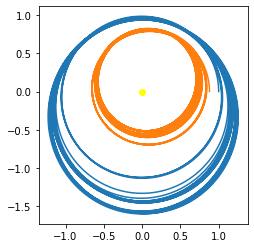

In [4]:
ci = [1,0,0,1,0.88,0,0,1]
sol,t = RK4(sist_sol,ci,[0,50*pi],[0.001,0.001],delta=0.0005)
plot(sol[0,:],sol[1,:],label="Tierra")
plot(sol[4,:],sol[5,:],label="Planetoide")

plot([0],[0],'o',color='yellow')
gca().set_aspect('equal')
show()

In [5]:
from scipy.integrate import *

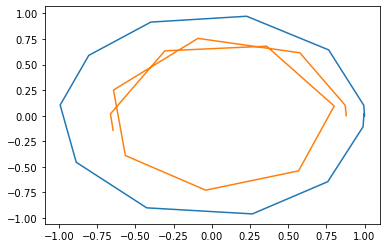

In [11]:
ci = array([1,0,0,1,0.88,0,0,1])
sol = solve_ivp(sist_sol,(0,2*pi),ci)
plot(sol.y[0],sol.y[1],label="Tierra")
plot(sol.y[4],sol.y[5],label="Planetoide")

#plot([0],[0],'o',color='yellow')
#gca().set_aspect('equal')
#show()